## PART-1
### SIMULATED ANNEALING

In [23]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


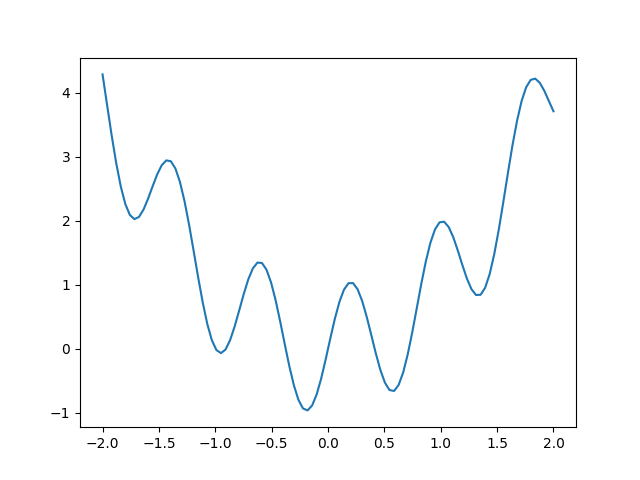

In [2]:
def f(x):
    return x**2 + np.sin(8*x)

def annealing(f,bestx,T,dr):
    global besty
    dx=(np.random.random_sample()-0.5) * T
    x=bestx + dx
    y=f(x)
    if y<besty:
        besty=y
        bestx=x
    else:
        toss=np.random.random_sample()
        if toss<np.exp(-(y-besty)/T):
            besty=y
            bestx=x
    return bestx,besty

T=3
dr=0.95
bestx=-2
besty=1000000
xbase = np.linspace(-2, 2, 100)
ybase = f(xbase)
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def onestep(frame):
    global bestx,besty,T,dr
    bestx,besty=annealing(f,bestx,T,dr)
    lngood.set_data(bestx, besty)
    T=T*dr
    xall.append(bestx)
    yall.append(besty)
    lnall.set_data(xall, yall)

ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

### Explaination
This is quiet mostly the Gradient Descent we have worked out in the previous week assignment. The one thing which was added to this code is *we move the point even if it is a worst case than before moving based on a probability and a random value generated between *0* and *1*. This increases our chances of getting to a global minimum much more than the normal gradient descent. By the way, it doesn't always reach to the optimum point since, most of the time it does depend on some random values got generated.

In [3]:
plt.close()

## PART-2
### Travelling Salesman Problem

[0, 6, 5, 4, 3, 1, 7, 9, 8, 2] 
 34.07656139463668


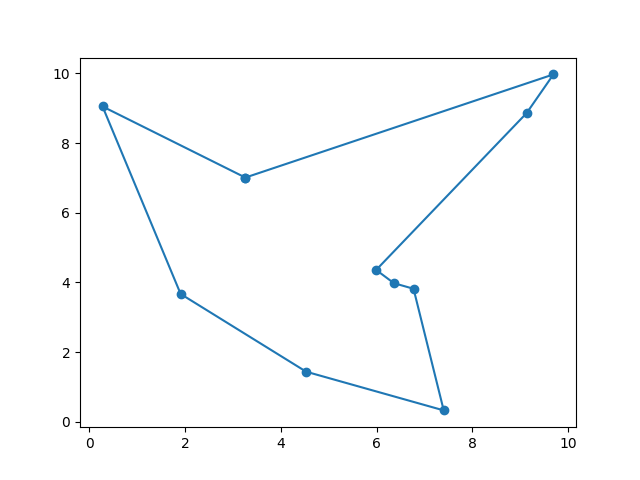

In [4]:
import numpy as np
import itertools

def dist(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

with open("tsp_10.txt") as f:
    coor=[]
    city=[]
    lines=f.readlines()
    n=int(lines[0])
    for i in range(1,n):
        city.append(i)

    for i in range(1,n+1):
        line=list(map(float,lines[i].split()))
        coor.append(line)
    
    bestd=1000000
    perm=itertools.permutations(city)
    for i in perm:
        i=list(i)
        i.insert(0,0)
        sum=0
        for j in range(len(i)-1):
            sum+=dist(coor[i[j]],coor[i[j+1]])
        sum+=dist(coor[i[len(i)-1]],coor[0])
        if sum<bestd:
            bestd=sum
            bestp=i
    print(bestp,"\n",bestd)
x_cities,y_cities=[],[]
for i in range(n):
    x_cities.append(coor[i][0])
    y_cities.append(coor[i][1])

bestp.append(0)
x_cities = np.array(x_cities)
y_cities = np.array(y_cities)
xplot = x_cities[bestp] 
yplot = y_cities[bestp]
plt.plot(xplot, yplot, "o-")
plt.show()

### Explaination
This is an extra work I did to actually find the best path available for the 10 cities. This is just checking all possible ways (all permutations) and finding the minimum distance that is possible to cover all cities and reach back to the starting point.

In [5]:
plt.close()

[0, 2, 8, 9, 7, 1, 3, 4, 5, 6] 
 34.076561394636684


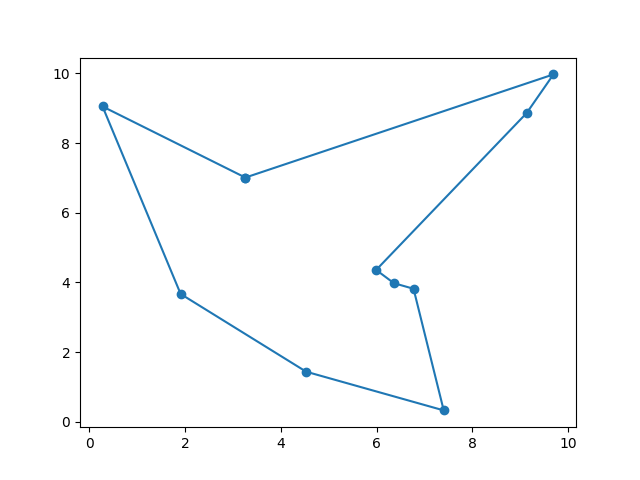

In [2]:
import random
from numpy import exp
def dist(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def sumd(coor,city):
    sum=0
    for i in range(len(city)):
        city1=coor[city[i]]
        city2=coor[city[(i + 1)%len(city)]]
        sum+=dist(city1,city2)
    return sum


with open("tsp_10.txt") as f:
    coor=[]
    lines=f.readlines()
    n=int(lines[0])
    city = list(range(0,n))
    for i in range(1,n+1):
        line=list(map(float,lines[i].split()))
        coor.append(line)
    t=1000
    dr=0.95
    frames=1000000
    cd=sumd(coor,city)
    bestd=cd
    bestc=city[:]
    for i in range(frames):
        new=city[:]
        i1=random.randint(1,n-1)
        i2=random.randint(1,n-1)
        new[i1],new[i2]=new[i2],new[i1]
        nd=sumd(coor,new)
        dif=nd-cd
        if dif<0 or random.random() < exp(-dif/t):
            city=new
            cd=nd
            if cd<bestd:
                bestd=cd
                bestc=city[:]
        t*=dr
    print(bestc,"\n",bestd)

    x_cities,y_cities=[],[]
for i in range(n):
    x_cities.append(coor[i][0])
    y_cities.append(coor[i][1])

    
bestc.append(0)
x_cities = np.array(x_cities)
y_cities = np.array(y_cities)
xplot = x_cities[bestc] 
yplot = y_cities[bestc]
plt.plot(xplot, yplot, "o-")
plt.show()

### Explaination
This code implements stimulated Annealing method to find the optimized path for a given number of iterations. The permutations method usually works for a quiet small number of cities due to its time complexity. It is told that for 20 cities, it takes about 100 years to evaluate the best path possible. So, To find the best it is quiet not that easy. So, we need to optimize as much as we can in a given time and that's what annealing do here. This is a similar algorithm I used in the first code.
First, I gave a random order of the cities(here always [0,1,2,3,4,5,6,7,8,9,0]) and found the distance covered to complete the path. Then I chose two indexes randomly from [1,9] and swap the places of those cities and calculate the distance covered. if the distance covered after swaping is lesser or the random value created was lesser than the probability $$P(\Delta Y) = e^{-\frac{\Delta Y}{T}}$$ I will continue to swap the cities and go in that way until I ran out of my iterations. Thus, the solution is optimized for a given amount of time.

In [16]:
plt.close()

[0, 34, 4, 89, 2, 5, 26, 78, 67, 35, 66, 9, 37, 11, 64, 17, 88, 16, 7, 27, 80, 6, 76, 18, 99, 52, 39, 50, 15, 86, 25, 30, 19, 93, 14, 65, 42, 84, 72, 87, 92, 57, 12, 61, 41, 73, 96, 20, 83, 43, 32, 33, 62, 85, 10, 77, 28, 91, 69, 47, 56, 45, 74, 40, 68, 51, 82, 46, 58, 75, 48, 49, 13, 98, 70, 1, 81, 44, 79, 23, 8, 94, 24, 60, 38, 63, 95, 36, 22, 21, 54, 3, 55, 31, 97, 53, 59, 29, 90, 71] 
 116.84999708754786


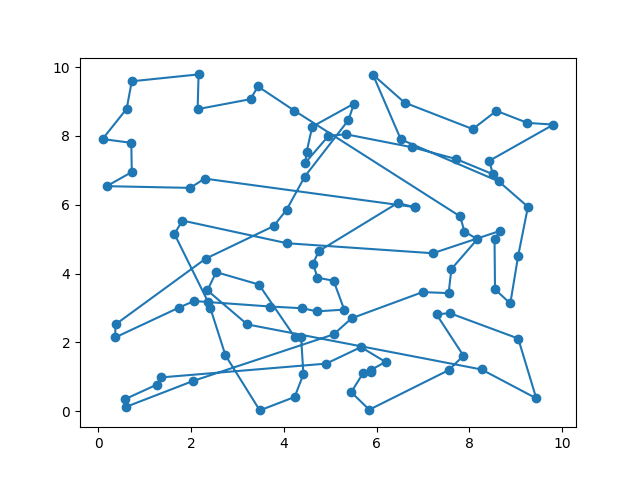

In [22]:
import random
from numpy import exp

def dist(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def sumd(coor,city):
    sum=0
    for i in range(len(city)):
        city1=coor[city[i]]
        city2=coor[city[(i + 1)%len(city)]]
        sum+=dist(city1,city2)
    return sum


with open("tsp_100.txt") as f:
    coor=[]
    lines=f.readlines()
    n=int(lines[0])
    city = list(range(0,n))
    for i in range(1,n+1):
        line=list(map(float,lines[i].split()))
        coor.append(line)
    t=100
    dr=0.95
    frames=100000
    cd=sumd(coor,city)
    bestd=cd
    bestc=city[:]
    for i in range(frames):
        new=city[:]
        i1=random.randint(1,n-1)
        i2=random.randint(1,n-1)
        new[i1],new[i2]=new[i2],new[i1]
        nd=sumd(coor,new)
        dif=nd-cd
        if dif<0 or random.random() < exp(-dif/t):
            city=new
            cd=nd
            if cd<bestd:
                bestd=cd
                bestc=city[:]
        t*=dr
    print(bestc,"\n",bestd)

    x_cities,y_cities=[],[]
for i in range(n):
    x_cities.append(coor[i][0])
    y_cities.append(coor[i][1])

    
bestc.append(0)
x_cities = np.array(x_cities)
y_cities = np.array(y_cities)
xplot = x_cities[bestc] 
yplot = y_cities[bestc]
plt.plot(xplot, yplot, "o-")
plt.show()

### Explaination
This is the same process as I explained for the 10 cities problem. Until, now the above path is the best path I got, after about 100's of trial and error.

In [21]:
plt.close()